# Apprentissage Automatique : BE 2 

## Premier apprentissage

In [1]:
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from core import *

In [2]:
np.random.seed(1) # pour que l'exécution soit déterministe

# N est le nombre de données d'entrée
# D_in est la dimension des données d'entrée
# D_h le nombre de neurones de la couche cachée
# D_out est la dimension de sortie (nombre de neurones de la couche de sortie

N, D_in, D_h, D_out = 30, 2, 10, 3
lr = 0.01 # learning rate

In [3]:
np.random.seed(1)
lLoss=[]

X = np.random.random((N, D_in))
Y = np.random.random((N, D_out))


'''Initialisation aléatoire des poids du réseau'''
W1,b1=declareLayer(D_in,D_h)
W2,b2=declareLayer(D_h,D_out)

''' Learning '''

for ii in tqdm(range(100000),desc='Learning...'):
    '''Forward '''
    O1 = forwardPass(X,W1,b1)
    O2 = forwardPass(O1,W2,b2)
    Y_pred = O2
    
    lLoss=printLoss(ii,lLoss,Y,Y_pred)

    ''' Backprog ''' 
    l2_error,l2_delta=backProgLastLayer(Y,Y_pred)
    l1_error,l1_delta=backProgHiddenLayer(l2_delta,W2,O1)

    W2,b2,O1=updateLayer(l2_delta,O1,W2,b2,lr,bFirstLayer=False)
    W1,b1,X=updateLayer(l1_delta,X,W1,b1,lr,bFirstLayer=True)
    
print('Done !')

Learning...: 100%|██████████| 100000/100000 [00:06<00:00, 15439.63it/s]

Done !


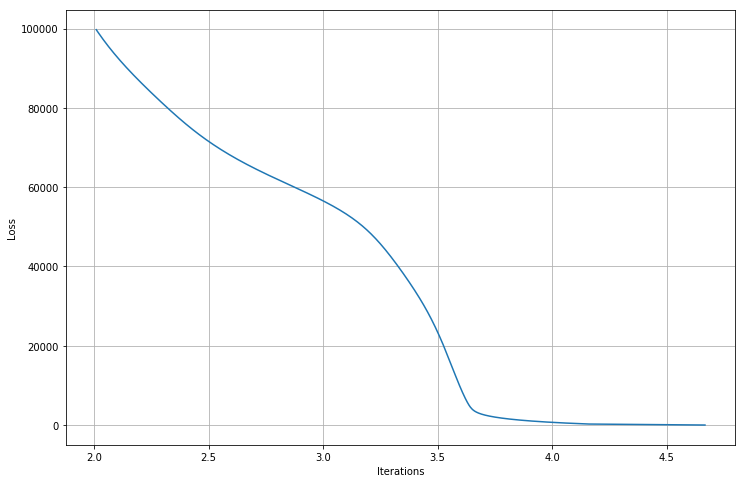

In [4]:
plt.figure(figsize=(12,8))
plt.plot(lLoss,[250*ii for ii in range (len(lLoss))])
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## MNIST



### Loading data

In [5]:
from mnist import MNIST
mdata = MNIST('MNIST-data')
DataApp, LabelApp = mdata.load_training()
DataTest, LabelTest = mdata.load_testing()

In [6]:
DataApp=np.asarray(DataApp)
LabelApp=np.asarray(LabelApp)
DataTest=np.asarray(DataTest)
LabelTest=np.asarray(LabelTest)

In [7]:
DataApp.shape

(60000, 784)

In [8]:
def decoupage_donnees(dataApp,labelApp,ratio):
    nr=int(ratio*dataApp.shape[0])
    l=list(range(dataApp.shape[0]))
    np.random.shuffle(l)

    dataLearning=np.asarray([dataApp[l[ii]] for ii in range(nr)])
    labelLearning=np.asarray([labelApp[l[ii]] for ii in range(nr)])
    dataEval=np.asarray([dataApp[l[ii+nr]] for ii in range(dataApp.shape[0]-nr)])
    labelEval=np.asarray([labelApp[l[ii+nr]] for ii in range(dataApp.shape[0]-nr)])
    return dataLearning,labelLearning,dataEval,labelEval

In [9]:
dataLearning,labelLearning,dataEval,labelEval=decoupage_donnees(DataApp,
                                                                LabelApp,
                                                                0.98)

In [10]:
def makeGT(x):
    z=np.zeros(10)
    z[x]=1
    return z

In [11]:
labelEvalArray=np.asarray(list(map(lambda x : makeGT(x) ,labelEval.tolist())))

In [24]:
dTest=DataTest[0:1200]
lTest=LabelTest[0:1200]

In [13]:
lTestArray=np.asarray(list(map(lambda x : makeGT(x) ,labelEval.tolist())))

### Launching learning

#### Loss functions

In [14]:
def calcLoss(rawGT,guess):
    return np.square(rawGT -guess).sum() / 2

In [15]:
def calcSuccess(gt,guess):
    test= gt==list(map(lambda x :np.argmax(x),guess))
    rightGuesses=len(list(filter(lambda x: x,test)))/len(gt)
    return rightGuesses

#### Learning

In [16]:
dataEval.shape

(1200, 784)

In [17]:
bashDataEval=dataEval.reshape(300,784,4)
bashLabelEval=labelEval.reshape(300,4)
bashLabelEvalArray=labelEvalArray.reshape(300,10,4)

In [18]:
bashDataEval.shape

(300, 784, 4)

In [19]:
# N est le nombre de données d'entrée
# D_in est la dimension des données d'entrée
# D_h le nombre de neurones de la couche cachée
# D_out est la dimension de sortie (nombre de neurones de la couche de sortie

N=bashDataEval.shape[0]
D_in=bashDataEval.shape[1]
D_h=100
D_out=10
lr = 0.001

In [28]:
np.random.seed(1)
lLearningLoss=[]
lLearningSuccess=[]
lEvalLoss=[]
lEvalSuccess=[]
lTestLoss=[]
lTestSuccess=[]

'''Initialisation aléatoire des poids du réseau'''
W1,b1=declareLayer(D_in,D_h)
W12,b12=declareLayer(D_h,D_h)
W2,b2=declareLayer(D_h,D_out)

''' Learning '''

for ii in tqdm(range(5000)):
        '''Forward '''
        O1 = forwardPass(dataEval,W1,b1)
        O12= forwardPass(,W12,b12)
        O2 = forwardPass(O1,W2,b2)
        
        Y_pred = O2

        if not ii % 250 :
            lLearningLoss.append(calcLoss(labelEvalArray,Y_pred))
            lLearningSuccess.append(calcSuccess(labelEval,Y_pred))
            
            O1Eval = forwardPass(dTest,W1,b1)
            O2Eval = forwardPass(O1Eval,W2,b2)
            Y_predEval = O2Eval
            lEvalLoss.append(calcLoss(lTestArray,Y_predEval))
            lEvalSuccess.append(calcSuccess(lTest,Y_predEval))

        ''' Backprog ''' 
        l2_error,l2_delta=backProgLastLayer(labelEvalArray,Y_pred)
        l1_error,l1_delta=backProgHiddenLayer(l2_delta,W2,O1)
        

        W2,b2,O1=updateLayer(l2_delta,O1,W2,b2,lr,bFirstLayer=False)
        W1,b1,dataEval=updateLayer(l1_delta,dataEval,W1,b1,lr,bFirstLayer=True)

  0%|          | 0/5000 [00:00<?, ?it/s]/home/apopov/Documents/ECL/S9/apprentissageAuto/apprentissage_auto/core.py:7: RuntimeWarning: overflow encountered in exp
  O = 1/(1+np.exp(-I))
100%|██████████| 5000/5000 [04:03<00:00, 20.54it/s]


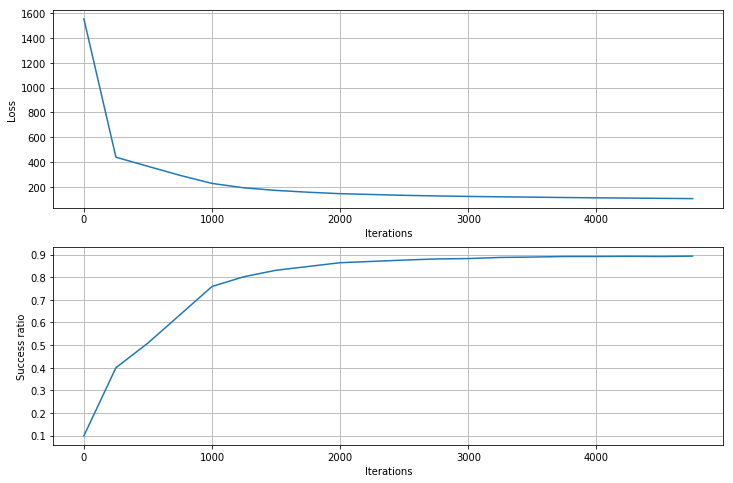

In [26]:
absisse=[ 250 * ii for ii in range(len(lLearningLoss))]

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(absisse,lLearningLoss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(212)
plt.grid(True)
plt.plot(absisse,lLearningSuccess)
plt.xlabel('Iterations')
plt.ylabel('Success ratio')

# plt.savefig('1LearningRate.png')

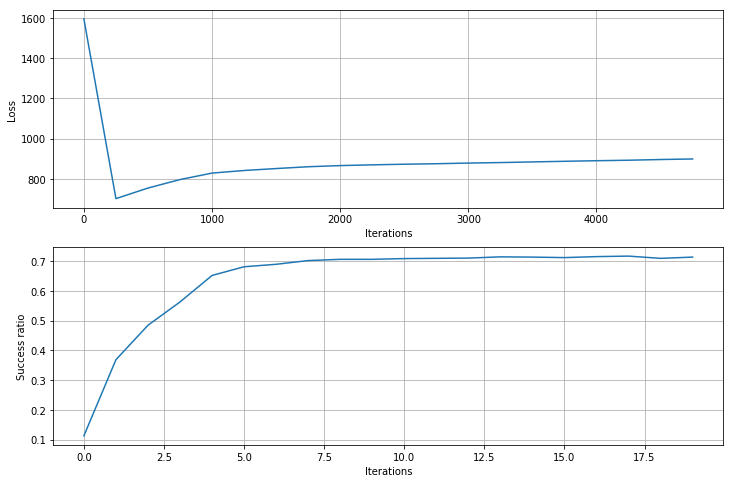

In [27]:
absisse=[ 250 * ii for ii in range(len(lEvalLoss))]

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(absisse,lEvalLoss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(212)
plt.grid(True)
plt.plot(lEvalSuccess)
plt.xlabel('Iterations')
plt.ylabel('Success ratio')
# plt.savefig('1EvalRate')